# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "c:/Users/ssteffen/desktop/Sam/Vanderbilt Boot Camp/MyRepo/Module 5_MatplotLib/PyBer_Analysis/Resources/city_data.csv"
ride_data_to_load = "c:/Users/ssteffen/desktop/Sam/Vanderbilt Boot Camp/MyRepo/Module 5_MatplotLib/PyBer_Analysis/Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"].sum()
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"].sum()
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"].sum()

print(f"Urban ride count: {urban_ride_count}\n"
      f"Suburban ride count: {suburban_ride_count}\n"
      f"Rural ride count: {rural_ride_count}")

Urban ride count: 1625
Suburban ride count: 625
Rural ride count: 125


In [4]:
# 2. Get the total drivers for each city type
urban_driver_total = int(urban_cities_df.groupby(["city"]).median()["driver_count"].sum())
suburban_driver_total = int(suburban_cities_df.groupby(["city"]).median()["driver_count"].sum())
rural_driver_total = int(rural_cities_df.groupby(["city"]).median()["driver_count"].sum())

print(f"Urban driver total: {urban_driver_total}\n"
   f"Suburban driver total: {suburban_driver_total}\n"
   f"Rural driver total: {rural_driver_total}")

Urban driver total: 2405
Suburban driver total: 490
Rural driver total: 78


In [5]:
#  3. Get the total amount of fares for each city type
urban_fares_total = urban_cities_df.groupby(["city"]).sum()["fare"].sum()
suburban_fares_total = suburban_cities_df.groupby(["city"]).sum()["fare"].sum()
rural_fares_total = rural_cities_df.groupby(["city"]).sum()["fare"].sum()

print(f"Urban fares total: ${urban_fares_total:,.2f}\n"
     f"Suburban fares total: ${suburban_fares_total:,.2f}\n"
     f"Rural fares total: ${rural_fares_total:,.2f}")

Urban fares total: $39,854.38
Suburban fares total: $19,356.33
Rural fares total: $4,327.93


In [6]:
#  4. Get the average fare per ride for each city type. 
urban_average_ride_fare = urban_fares_total / urban_ride_count
suburban_average_ride_fare = suburban_fares_total / suburban_ride_count
rural_average_ride_fare = rural_fares_total / rural_ride_count

print(f"Urban average ride fare: ${urban_average_ride_fare:,.2f}\n"
     f"Suburban average ride fare: ${suburban_average_ride_fare:,.2f}\n"
     f"Rural average ride fare: ${rural_average_ride_fare:,.2f}")

Urban average ride fare: $24.53
Suburban average ride fare: $30.97
Rural average ride fare: $34.62


In [7]:
# 5. Get the average fare per driver for each city type. 
urban_average_driver_fare = urban_fares_total / urban_driver_total
suburban_average_driver_fare = suburban_fares_total / suburban_driver_total
rural_average_driver_fare = rural_fares_total / rural_driver_total

print(f"Urban average driver fare: ${urban_average_driver_fare:,.2f}\n"
     f"Suburban average driver fare: ${suburban_average_driver_fare:,.2f}\n"
     f"Rural average driver fare: ${rural_average_driver_fare:,.2f}")

Urban average driver fare: $16.57
Suburban average driver fare: $39.50
Rural average driver fare: $55.49


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {"Type" : ["Rural", "Suburban", "Urban"],
     "Total Rides": [rural_ride_count, suburban_ride_count, urban_ride_count],
     "Total Drivers": [rural_driver_total, suburban_driver_total, urban_driver_total],
     "Total Fares": [rural_fares_total, suburban_fares_total, urban_fares_total],
     "Average Fare Per Ride": [rural_average_ride_fare, suburban_average_ride_fare, urban_average_ride_fare],
     "Average Fare Per Driver": [rural_average_driver_fare, suburban_average_driver_fare, urban_average_driver_fare]}
    ).set_index("Type")

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name.
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_sum_df = pd.DataFrame(pyber_data_df.groupby(["type","date"]).sum()["fare"])
fares_sum_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_sum_df = fares_sum_df.reset_index()
fares_sum_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_sum_df = fares_sum_df.pivot_table(index ="date", columns ="type", values="fare")
fares_sum_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_Apr_df = fares_sum_df.loc["2019-01-01":"2019-04-29"]
fares_Jan_Apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_sum_df.index = pd.to_datetime(fares_sum_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
Rural       125 non-null float64
Suburban    625 non-null float64
Urban       1625 non-null float64
dtypes: float64(3)
memory usage: 74.2 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_sum_df = fares_sum_df.resample("W").sum()
fares_sum_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


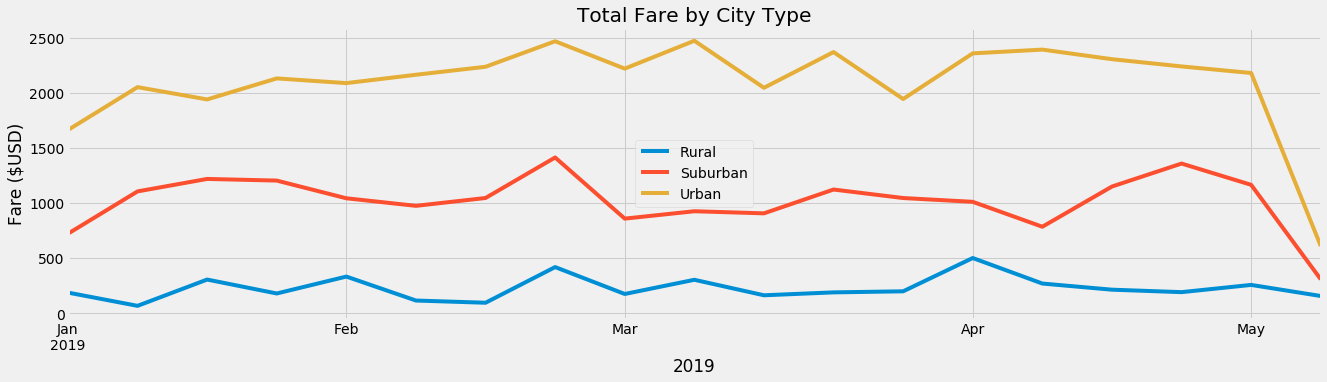

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = fares_sum_df.plot(x=None, y=["Rural", "Suburban", "Urban"], figsize = (20,5))
#center the legend
ax.legend(loc = "center")

#add label to x-axis
ax.set_xlabel("2019")

#add label to y-axis
ax.set_ylabel("Fare ($USD)")

#add a title
ax.set_title("Total Fare by City Type")

# Save the figure.
plt.savefig("../Pyber_Analysis/Analysis/Pyber_fare_summary.png")

# Show the plot
plt.show()